In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
def evalmod(row, SE="ionbot"):
    if pd.isna(row["fragger_mods_formatted"]):
        if not pd.isna(row["ionbot_mods_formatted"]): #If msfragger doesn't give mods but ionbot does
            return "Newly modified"
        else:                                                #If both msfragger and ionbot dont give mods
            return "Remains unmodified"
    else:
        if not pd.isna(row["ionbot_mods_formatted"]): #If msfragger gives mods and ionbot gives mods
            if row["ionbot_mods_formatted"] == row["fragger_mods_formatted"]:
                return "Same modifications"
            else:
                return "Different modifications"
        else:
            return "No longer modified"

In [20]:
def evalseq(row, SE="ionbot"):
    if row["ionbot Sequence"] == row["Fragger Sequence"]:
        return True
    else:
        return False

In [21]:
data = pd.read_csv("Allmatched.tsv")

In [22]:
data.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0", "ionbot_seq_eval", "fragger_seq_eval", "pfind_seq_eval", "ionbot_mods_eval", "fragger_mods_eval", "pfind_mods_eval"], axis=1, inplace=True)

# ionbot-MSFragger

In [23]:
codedict = {"1111-111111" : "Same for all 4", "1111-101010" : "pFind deviates", "1111-110100" : "Comet deviates", "1111-000111": "ionbot deviates", "1111-011001" : "MSFragger deviates", "1111-000100" : "MSFragger & pFind agree, ionbot and Comet differ", "1111-010010": "ionbot = pFind & MSFragger = Comet", "1111-000001" : "pFind and Comet agree, ionbot and MSFragger differ", "1111-010000" : "ionbot and pFind agree, MSFragger and Comet differ", "1111-000000" : "Different for all 4", "1111-001000" : "ionbot and Comet agree, MSFragger and pFind differ", "1111-100001" : "ionbot = MSFragger & pFind = Comet", "1111-000010":"MSFragger and Comet agree, pFind and ionbot differ", "1111-100000" : "ionbot and MSFragger agree, pFind and Comet differ", "1111-001100" : "ionbot = Comet & MSFragger = pFind"}
data.replace({"code" : codedict}, inplace=True)

In [24]:
ionbotvfragger = data[data["code"].isin(["ionbot deviates", "MSFragger deviates", "MSFragger & pFind agree, ionbot and Comet differ", "ionbot = pFind & MSFragger = Comet", "pFind and Comet agree, ionbot and MSFragger differ", "pFind and Comet agree, ionbot and MSFragger differ", "ionbot and pFind agree, MSFragger and Comet differ", "Different for all 4", "ionbot and Comet agree, MSFragger and pFind differ", "MSFragger and Comet agree, pFind and ionbot differ"])]

In [25]:
ionbotvfragger

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,...,all_fragger_mods,fragger_mods_formatted,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code
5,131023_Sunil_PPT_Brain_A_01,10259.0,1489.73325,LQGIVSWGSNCAQK,1489.73472,1432.7133,10|Gly->Asn[G],substitution,0.00296,0.00078,...,11C(57.0214)#nan,['carbamidomethyl'],['carbamidomethyl'],['carbamidomethyl'],131023_Sunil_PPT_Brain_A_0110259.0LQGIVSWGSNCA...,131023_Sunil_PPT_Brain_A_0110259.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110259.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110259.0LQGIVSWGSGCA...,0.0000,ionbot deviates
9,131023_Sunil_PPT_Brain_A_01,10369.0,1489.73289,LQGIVSWGSNCAQK,1489.73472,1432.7133,10|Gly->Asn[G],substitution,0.00296,0.00066,...,11C(57.0214)#nan,['carbamidomethyl'],['carbamidomethyl'],['carbamidomethyl'],131023_Sunil_PPT_Brain_A_0110369.0LQGIVSWGSNCA...,131023_Sunil_PPT_Brain_A_0110369.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110369.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110369.0LQGIVSWGSGCA...,0.0002,ionbot deviates
17,131023_Sunil_PPT_Brain_A_01,10513.0,2266.00275,GAGQGPITEDMLCAGYLEGER,2265.98816,2208.9771,x|[914]Methylmalonylation[S],[914]Methylmalonylation[S],0.00296,0.03493,...,"11M(15.9949), 13C(57.0214)#nan","['carbamidomethyl', 'oxidation']","['carbamidomethyl', 'oxidation']","['carbamidomethyl', 'oxidation']",131023_Sunil_PPT_Brain_A_0110513.0GAGQGPITEDML...,131023_Sunil_PPT_Brain_A_0110513.0SAYPGQITSNMF...,131023_Sunil_PPT_Brain_A_0110513.0SAYPGQITSNMF...,131023_Sunil_PPT_Brain_A_0110513.0SAYPGQITSNMF...,0.0023,ionbot deviates
21,131023_Sunil_PPT_Brain_A_01,10677.0,1489.73355,LQGIVSWGSNCAQK,1489.73472,1432.7133,10|Gly->Asn[G],substitution,0.00296,0.01455,...,11C(57.0214)#nan,['carbamidomethyl'],['carbamidomethyl'],['carbamidomethyl'],131023_Sunil_PPT_Brain_A_0110677.0LQGIVSWGSNCA...,131023_Sunil_PPT_Brain_A_0110677.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110677.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110677.0LQGIVSWGSGCA...,0.0215,ionbot deviates
25,131023_Sunil_PPT_Brain_A_01,10820.0,1489.72915,LQGIVSWGSNCAQK,1489.73472,1432.7133,10|Gly->Asn[G],substitution,0.00296,0.02879,...,11C(57.0214)#nan,['carbamidomethyl'],['carbamidomethyl'],['carbamidomethyl'],131023_Sunil_PPT_Brain_A_0110820.0LQGIVSWGSNCA...,131023_Sunil_PPT_Brain_A_0110820.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110820.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110820.0LQGIVSWGSGCA...,0.0266,ionbot deviates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75373,131121_Sunil_Prot_BrainAmine_AProfile_26,5388.0,1193.47898,DNCCILDER,1193.48056,1079.4376,4|[121]GG[C],[121]GG[C],0.00125,0.03581,...,"3C(57.0214), 4C(57.0214)#nan","['carbamidomethyl', 'carbamidomethyl']","['carbamidomethyl', 'carbamidomethyl']","['carbamidomethyl', 'carbamidomethyl']",131121_Sunil_Prot_BrainAmine_AProfile_265388.0...,131121_Sunil_Prot_BrainAmine_AProfile_265388.0...,131121_Sunil_Prot_BrainAmine_AProfile_265388.0...,131121_Sunil_Prot_BrainAmine_AProfile_265388.0...,0.0242,ionbot deviates
75389,131121_Sunil_Prot_BrainAmine_AProfile_26,5845.0,2584.10830,VHTECCHGDLLECADDRADLAK,2584.11040,2413.0460,13|[4]carbamidomethyl[C]|5|[1290]Dicarbamidome...,[1290]Dicarbamidomethyl[C],0.00125,0.00006,...,"13C(57.0214), 5C(57.0214), 6C(57.0214)#nan","['carbamidomethyl', 'carbamidomethyl', 'carbam...","['carbamidomethyl', 'carbamidomethyl', 'carbam...","['carbamidomethyl', 'carbamidomethyl', 'carbam...",131121_Sunil_Prot_BrainAmine_AProfile_265845.0...,131121_Sunil_Prot_BrainAmine_AProfile_265845.0...,131121_Sunil_Prot_BrainAmine_AProfile_265845.0...,131121_Sunil_Prot_BrainAmine_AProfile_265845.0...,0.0000,ionbot deviates
75427,131121_Sunil_Prot_BrainAmine_AProfile_26,7128.0,1617.78342,TPCTVTCNIPVVSGK,1617.78544,1503.7425,3|[4]carbamidomethyl[C]|7|[5]Carbamyl[C],[5]Carbamyl[C],0.00125,0.00000,...,"3C(57.0214), 7C

In [26]:
ionbotvfragger["Seq_eval"] = ionbotvfragger.apply(evalseq, axis=1)
ionbotvfragger["Mod_eval"] = ionbotvfragger.apply(evalmod, axis=1)

/tmp/ipykernel_3317026/847829471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ionbotvfragger["Seq_eval"] = ionbotvfragger.apply(evalseq, axis=1)
/tmp/ipykernel_3317026/847829471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ionbotvfragger["Mod_eval"] = ionbotvfragger.apply(evalmod, axis=1)


In [27]:
ionbotvfragger

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
5,131023_Sunil_PPT_Brain_A_01,10259.0,1489.73325,LQGIVSWGSNCAQK,1489.73472,1432.7133,10|Gly->Asn[G],substitution,0.00296,0.00078,...,['carbamidomethyl'],['carbamidomethyl'],131023_Sunil_PPT_Brain_A_0110259.0LQGIVSWGSNCA...,131023_Sunil_PPT_Brain_A_0110259.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110259.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110259.0LQGIVSWGSGCA...,0.0000,ionbot deviates,False,Different modifications
9,131023_Sunil_PPT_Brain_A_01,10369.0,1489.73289,LQGIVSWGSNCAQK,1489.73472,1432.7133,10|Gly->Asn[G],substitution,0.00296,0.00066,...,['carbamidomethyl'],['carbamidomethyl'],131023_Sunil_PPT_Brain_A_0110369.0LQGIVSWGSNCA...,131023_Sunil_PPT_Brain_A_0110369.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110369.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110369.0LQGIVSWGSGCA...,0.0002,ionbot deviates,False,Different modifications
17,131023_Sunil_PPT_Brain_A_01,10513.0,2266.00275,GAGQGPITEDMLCAGYLEGER,2265.98816,2208.9771,x|[914]Methylmalonylation[S],[914]Methylmalonylation[S],0.00296,0.03493,...,"['carbamidomethyl', 'oxidation']","['carbamidomethyl', 'oxidation']",131023_Sunil_PPT_Brain_A_0110513.0GAGQGPITEDML...,131023_Sunil_PPT_Brain_A_0110513.0SAYPGQITSNMF...,131023_Sunil_PPT_Brain_A_0110513.0SAYPGQITSNMF...,131023_Sunil_PPT_Brain_A_0110513.0SAYPGQITSNMF...,0.0023,ionbot deviates,False,Different modifications
21,131023_Sunil_PPT_Brain_A_01,10677.0,1489.73355,LQGIVSWGSNCAQK,1489.73472,1432.7133,10|Gly->Asn[G],substitution,0.00296,0.01455,...,['carbamidomethyl'],['carbamidomethyl'],131023_Sunil_PPT_Brain_A_0110677.0LQGIVSWGSNCA...,131023_Sunil_PPT_Brain_A_0110677.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110677.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110677.0LQGIVSWGSGCA...,0.0215,ionbot deviates,False,Different modifications
25,131023_Sunil_PPT_Brain_A_01,10820.0,1489.72915,LQGIVSWGSNCAQK,1489.73472,1432.7133,10|Gly->Asn[G],substitution,0.00296,0.02879,...,['carbamidomethyl'],['carbamidomethyl'],131023_Sunil_PPT_Brain_A_0110820.0LQGIVSWGSNCA...,131023_Sunil_PPT_Brain_A_0110820.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110820.0LQGIVSWGSGCA...,131023_Sunil_PPT_Brain_A_0110820.0LQGIVSWGSGCA...,0.0266,ionbot deviates,False,Different modifications
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75373,131121_Sunil_Prot_BrainAmine_AProfile_26,5388.0,1193.47898,DNCCILDER,1193.48056,1079.4376,4|[121]GG[C],[121]GG[C],0.00125,0.03581,...,"['carbamidomethyl', 'carbamidomethyl']","['carbamidomethyl', 'carbamidomethyl']",131121_Sunil_Prot_BrainAmine_AProfile_265388.0...,131121_Sunil_Prot_BrainAmine_AProfile_265388.0...,131121_Sunil_Prot_BrainAmine_AProfile_265388.0...,131121_Sunil_Prot_BrainAmine_AProfile_265388.0...,0.0242,ionbot deviates,True,Different modifications
75389,131121_Sunil_Prot_BrainAmine_AProfile_26,5845.0,2584.10830,VHTECCHGDLLECADDRADLAK,2584.11040,2413.0460,13|[4]carbamidomethyl[C]|5|[1290]Dicarbamidome...,[1290]Dicarbamidomethyl[C],0.00125,0.00006,...,"['carbamidomethyl', 'carbamidomethyl', 'carbam...","['carbamidomethyl', 'carbamidomethyl', 'carbam...",131121_Sunil_Prot_BrainAmine_AProfile_265845.0...,131121_Sunil_Prot_BrainAmine_AProfile_265845.0...,131121_Sunil_Prot_BrainAmine_AProfile_265845.0...,131121_Sunil_Prot_BrainAmine_AProfile_265845.0...,0.0000,ionbot deviates,True,Different modifications
75427,131121_Sunil_Prot_BrainAmine_AProfile_26,7128.0,1617.78342,TPCTVTCNIPVVSGK,1617.78544,1503.7425,3|[4]carbamidomethyl[C]|7|[5]Carbamyl[C],[5]Carbamyl[C],0.00125,0.00000,...,"['carbamidomethyl', 'carbamidomethyl']","['carbamidomethyl', 'carbamidomethyl']",131121_Sunil_Prot_BrainAmine_AProfile_267128.0...,131121_Sunil_Prot_BrainAmine_AProfile_267128.0...,131121_Sunil_Prot_BrainAmine_APro

In [28]:
ifwhich = ionbotvfragger.groupby(["Seq_eval", "Mod_eval"])["ionbotID"].count().reset_index()

In [29]:
ifwhich

,Seq_eval,Mod_eval,ionbotID
0,False,Different modifications,700
1,False,Newly modified,242
2,False,No longer modified,445
3,False,Remains unmodified,648
4,False,Same modifications,166
5,True,Different modifications,1728
6,True,Newly modified,402
7,True,No longer modified,393


In [30]:
ifwhich["Relative occurrence"] = ifwhich["ionbotID"]

In [31]:
seqevaltrue = ifwhich[ifwhich["Seq_eval"]==True]
seqevalfalse= ifwhich[ifwhich["Seq_eval"]==False]

In [32]:
seqevaltrue

,Seq_eval,Mod_eval,ionbotID,Relative occurrence
5,True,Different modifications,1728,1728
6,True,Newly modified,402,402
7,True,No longer modified,393,393


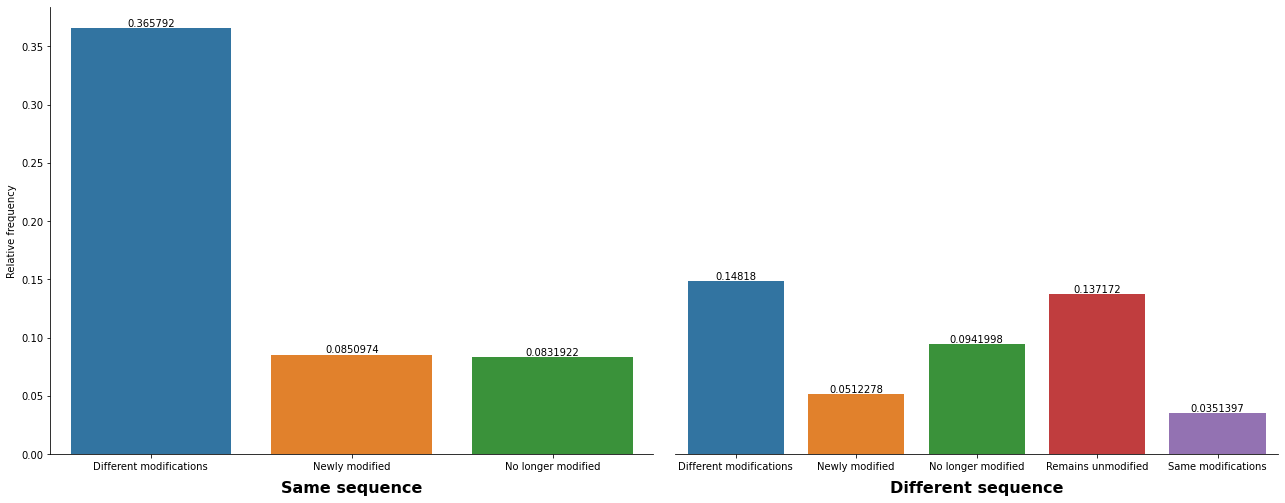

In [33]:
#Hier verder werken!

fig, axes = plt.subplots(1,2,sharey=True, figsize=(18,7))
a = sns.barplot(data=seqevaltrue, x="Mod_eval", y=ifwhich["ionbotID"]/ifwhich["ionbotID"].sum(), ax=axes[0])
b = sns.barplot(data = seqevalfalse, x="Mod_eval", y=ifwhich["ionbotID"]/ifwhich["ionbotID"].sum(), ax=axes[1])
axes[0].set_ylabel("Relative frequency")
axes[1].set_ylabel("Relative frequency")
axes[1].yaxis.set_tick_params(labelbottom=True)
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].set_title("Same sequence", fontweight="bold", fontsize=16, y=-.10)
axes[1].set_title("Different sequence", fontweight="bold", fontsize=16, y=-0.10)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

#axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
#axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
# axes[1].axes.get_yaxis().set_ticks([])
axes[1].axes.get_yaxis().set_visible(False)
for container in axes[0].containers:
    axes[0].bar_label(container)
for container in axes[1].containers:
    axes[1].bar_label(container)

fig.tight_layout()

In [34]:
#Same sequence, different modifications
ionbotvfragger[(ionbotvfragger["Mod_eval"] == "Different modifications") & (ionbotvfragger["Seq_eval"] == True)].groupby(["ionbot_mods_formatted", "fragger_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot_mods_formatted,fragger_mods_formatted,,,,,,,,,,,,,,,,,,,,,
['propionamide'],"['carbamidomethyl', 'methyl']",230,230,230,230,230,230,230,230,230,230,...,229,230,230,230,230,230,230,230,230,230
"['delta:h(2)c(2)', 'oxidation']",['acetyl'],185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185
"['carbamidomethyl', 'gly']","['carbamidomethyl', 'carbamidomethyl']",180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
"['carbamidomethyl', 'dicarbamidomethyl']","['carbamidomethyl', 'carbamidomethyl', 'carbamidomethyl']",82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
"['carbamidomethyl', 'gg']","['carbamidomethyl', 'carbamidomethyl', 'carbamidomethyl']",80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
"['carbamidomethyl', 'carbamidomethyl[c]|4|[4]carbamidomethyl']","['carbamidomethyl', 'carbamidomethyl', 'carbamidomethyl']",72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
['guanidinyl'],['acetyl'],68,68,68,68,68,68,68,68,68,68,...,68,65,68,68,68,68,68,68,68,68


In [35]:
#Same sequence, newly modified
ionbotvfragger[(ionbotvfragger["Mod_eval"] == "Newly modified") & (ionbotvfragger["Seq_eval"] == True)].groupby(["ionbot_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot_mods_formatted,,,,,,,,,,,,,,,,,,,,,
['deamidated'],240,240,240,240,240,240,240,240,240,240,...,93,34,240,240,240,240,240,240,240,240
"['deoxy', 'oxidation']",142,142,142,142,142,142,142,142,142,142,...,2,0,142,142,142,142,142,142,142,142
['acetyl'],3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
['clip_traq_4'],3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
['met->aspsa'],3,3,3,3,3,3,3,3,3,3,...,0,0,3,3,3,3,3,3,3,3
['methylphosphonate'],2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
['acetyl_13c(2)'],1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [36]:
#Same sequence, no longer modified
ionbotvfragger[(ionbotvfragger["Mod_eval"] == "No longer modified") & (ionbotvfragger["Seq_eval"] == True)].groupby(["fragger_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
fragger_mods_formatted,,,,,,,,,,,,,,,,,,,,,
['deamidated'],123,123,123,123,123,123,0,0,123,123,...,39,42,123,123,123,123,123,123,123,123
['amidated'],112,112,112,112,112,112,0,0,112,112,...,5,4,112,112,112,112,112,112,112,112
['lys->allysine'],64,64,64,64,64,64,0,0,64,64,...,8,8,64,64,64,64,64,64,64,64
['didehydro'],43,43,43,43,43,43,0,0,43,43,...,1,0,43,43,43,43,43,43,43,43
['lys'],17,17,17,17,17,17,0,0,17,17,...,4,4,17,17,17,17,17,17,17,17
['glu->pyro-glu+methyl'],10,10,10,10,10,10,0,0,10,10,...,0,0,10,10,10,10,10,10,10,10
['glu->pyro-glu+methyl:2h(2)13c(1)'],6,6,6,6,6,6,0,0,6,6,...,0,0,6,6,6,6,6,6,6,6


In [37]:
ionbotvfragger.columns

Index(['Spectrum File', 'Scan', 'precursor_mass', 'ionbot Sequence',
       'ionbot peptide mass', 'comet peptide mass', 'ionbot modifications',
       'ionbot unexpected modifications', 'ionbot q-value', 'ionbot PEP',
       'Fragger Sequence', 'Fragger Modified Sequence', 'Fragger Probability',
       'Fragger modifications', 'Fragger unexpected modifications',
       'MSFragger Localization', 'pFind Sequence', 'pFind Modification',
       'pFind q-value', 'Comet Sequence', 'Comet q-value', 'Comet PEP',
       'MSFragger Peptide Mass', 'pFind Peptide Mass', 'ionbot proteins',
       'comet proteins', 'fragger proteins', 'pfind proteins',
       'Comet Raw Sequence', 'ionbot_mods_formatted', 'all_fragger_mods',
       'fragger_mods_formatted', 'pfind_mods_formatted',
       'comet_mods_formatted', 'ionbotID', 'FraggerID', 'pFindID', 'CometID',
       'Fragger PEP', 'code', 'Seq_eval', 'Mod_eval'],
      dtype='object')

In [38]:
#Diff sequence, different modifications
ionbotvfragger[(ionbotvfragger["Mod_eval"] == "Different modifications") & (ionbotvfragger["Seq_eval"] == False)].groupby(["ionbot Sequence", "Fragger Sequence", "ionbot_mods_formatted", "fragger_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,,,,Spectrum File,Scan,precursor_mass,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,Fragger Modified Sequence,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot Sequence,Fragger Sequence,ionbot_mods_formatted,fragger_mods_formatted,,,,,,,,,,,,,,,,,,,,,
LQGIVSWGSNCAQK,LQGIVSWGSGCAQK,['gly->asn'],['carbamidomethyl'],228,228,228,228,228,228,228,228,228,228,...,228,228,228,228,228,228,228,228,228,228
TPCTVTCNIPVVSGK,TPCTVSCNIPVVSGK,"['carbamidomethyl', 'carbamyl']","['carbamidomethyl', 'carbamidomethyl']",51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
FFESFGDLSSPDAVMGNPK,FFESFGDLSTPDAVMGNPK,"['methyl', 'oxidation']",['oxidation'],15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
YPIEHGIVTNWDDMEK,YPIEHGIITNWDDMEK,"['methyl', 'oxidation']",['oxidation'],15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
VESKYGPPCPSCPAPEFLGGPSVFLFPPKPK,SCDKTHTCPPCPAPELLGGPSVFLFPPKPK,['carbamidomethyl'],"['carbamidomethyl', 'carbamidomethyl', 'carbamidomethyl']",12,12,12,12,12,12,0,12,12,12,...,12,12,12,12,12,12,12,12,12,12
VMPICLPSKNYAEVGR,VMPICLPSKDYAEVGR,"['carbamidomethyl', 'deamidated']",['carbamidomethyl'],11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
LKECCDKPLLEK,LKECCEKPLLEK,"['carbamidomethyl', 'carbamidomethyl[c]|6|[34]methyl']","['carbamidomethyl', 'carbamidomethyl']",10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [39]:
#Diff sequence, different modifications
ionbotvfragger[(ionbotvfragger["Mod_eval"] == "Newly modified") & (ionbotvfragger["Seq_eval"] == False)].groupby(["ionbot Sequence", "Fragger Sequence", "ionbot_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,,,Spectrum File,Scan,precursor_mass,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,Fragger Modified Sequence,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot Sequence,Fragger Sequence,ionbot_mods_formatted,,,,,,,,,,,,,,,,,,,,,
TTPPMLDSDGSFFLYSK,TTPPVLDSDGSFFLYSK,['met->aspsa'],23,23,23,23,23,23,23,23,23,0,...,0,0,23,23,23,23,23,23,23,23
YPIEHGIVTNWDDMEK,YPIEHGIITNWDDMEK,['methyl'],19,19,19,19,19,19,19,19,19,0,...,17,0,19,19,19,19,19,19,19,19
VAPEEHPTLLTEAPLNPK,VAPEEHPVLLTEAPLNPK,['didehydro'],5,5,5,5,5,5,5,5,5,0,...,0,0,5,5,5,5,5,5,5,5
MAATFIGNSTAIQELFK,MSATFIGNSTAIQELFK,['oxidation'],4,4,4,4,4,4,0,4,4,0,...,4,4,4,4,4,4,4,4,4,4
PGVLPLTQPVGPINR,SGDRGETGPAGPAGPVGPVGAR,['hex(2)sulf(1)'],3,3,3,3,3,3,3,3,3,0,...,0,0,3,3,3,3,3,3,3,3
GVVPLAGTNGETTTQGLDGLSER,GVVPLAGTDGETTTQGLDGLSER,['deamidated'],3,3,3,3,3,3,3,3,3,0,...,0,0,3,3,3,3,3,3,3,3
GTFCSFDTPDDSIR,SEEVATKEELVADAK,['carbamidomethyl'],3,3,3,3,3,3,0,3,3,0,...,1,1,3,3,3,3,3,3,3,3


In [40]:
#Diff sequence, no longer modified
ionbotvfragger[(ionbotvfragger["Mod_eval"] == "No longer modified") & (ionbotvfragger["Seq_eval"] == False)].groupby(["ionbot Sequence", "Fragger Sequence", "fragger_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,,,Spectrum File,Scan,precursor_mass,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,Fragger Modified Sequence,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot Sequence,Fragger Sequence,fragger_mods_formatted,,,,,,,,,,,,,,,,,,,,,
QGAIVAVTGDGVNDSPALK,LGAIVAVTGDGVNDSPALK,['pro->pyro-glu'],16,16,16,16,16,0,0,16,16,0,...,0,0,16,16,16,16,16,16,16,16
RAAPEASGTPSSDAVSR,AAPEASGTPSSDAVSR,['arg'],13,13,13,13,13,0,0,13,13,0,...,13,13,13,13,13,13,13,13,13,13
TPLTATLSK,LCTVATLR,['carbamidomethyl'],10,10,10,10,10,0,0,10,10,10,...,10,10,10,10,10,10,10,10,10,10
RGTGGVDTAAVGGVFDVSNADR,GTGGVDTAAVGGVFDVSNADR,['arg'],8,8,8,8,8,0,0,8,8,0,...,8,8,8,8,8,8,8,8,8,8
VAVFGAGGVGK,IGLFGGAGVGK,['gln->pyro-glu'],8,8,8,8,8,0,0,8,8,0,...,8,0,8,8,8,8,8,8,8,8
GTVAAPSVFIFPPSDEQLK,TVAAPSVFIFPPSDEQLK,['carbamidomethyl'],8,8,8,8,8,0,0,8,8,0,...,0,0,8,8,8,8,8,8,8,8
TTGIVMDSGDGVTHTVPIYEGYALPHAILR,TTGIVMDSGDGVTHIVPIYEGYALPHAILR,['oxidation'],7,7,7,7,7,0,0,7,7,7,...,0,0,7,7,7,7,7,7,7,7


In [41]:
#Diff sequence, no longer modified
ionbotvfragger[(ionbotvfragger["Mod_eval"] == "Remains unmodified") & (ionbotvfragger["Seq_eval"] == False)].groupby(["ionbot Sequence","Fragger Sequence"]).count().sort_values("Scan", ascending=False).head(7)

,,Spectrum File,Scan,precursor_mass,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,Fragger Modified Sequence,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot Sequence,Fragger Sequence,,,,,,,,,,,,,,,,,,,,,
ILLLGAGESGK,LLLLGAGESGK,29,29,29,29,29,0,0,29,29,0,...,0,0,29,29,29,29,29,29,29,29
GVVPLAGTDGETTTQGLDGLSER,GVVPLAGTNGETTTQGLDGLSER,28,28,28,28,28,0,0,28,28,0,...,0,0,28,28,28,28,28,28,28,28
VEILANDQGNR,VEIIANDQGNR,27,27,27,27,27,0,0,27,27,0,...,0,0,27,27,27,27,27,27,27,27
VNIIPLIAK,VNIIPIIAK,21,21,21,21,21,0,0,21,21,0,...,0,0,21,21,21,21,21,21,21,21
VNIVPLIAK,VNIVPILAK,19,19,19,19,19,0,0,19,19,0,...,0,0,19,19,19,19,19,19,19,19
TLTLVDTGIGMTK,TLTIVDTGIGMTK,16,16,16,16,16,0,0,16,16,0,...,0,0,16,16,16,16,16,16,16,16
FKDLGEENFK,DLGEENFK,15,15,15,15,15,0,0,15,15,0,...,0,0,15,15,15,15,15,15,15,15


In [42]:
#Diff sequence, no longer modified
ionbotvfragger[(ionbotvfragger["Mod_eval"] == "Same modifications") & (ionbotvfragger["Seq_eval"] == False)].groupby(["ionbot Sequence","Fragger Sequence"]).count().sort_values("Scan", ascending=False).head(7)

,,Spectrum File,Scan,precursor_mass,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,Fragger Modified Sequence,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot Sequence,Fragger Sequence,,,,,,,,,,,,,,,,,,,,,
EIVHIQAGQCGNQIGAK,EIVHLQAGQCGNQIGAK,89,89,89,89,89,89,2,89,89,89,...,89,89,89,89,89,89,89,89,89,89
TLTLVDTGIGMTK,TLTIVDTGIGMTK,10,10,10,10,10,10,1,10,10,10,...,10,10,10,10,10,10,10,10,10,10
TAVCDIPPR,VAVCDIPPR,5,5,5,5,5,5,0,5,5,5,...,4,5,5,5,5,5,5,5,5,5
FGEVVDCTLK,FGEVVDCTIK,5,5,5,5,5,5,0,5,5,5,...,5,5,5,5,5,5,5,5,5,5
MREIVHIQAGQCGNQIGAK,MREIVHLQAGQCGNQIGAK,5,5,5,5,5,5,0,5,5,5,...,5,5,5,5,5,5,5,5,5,5
NVQPEDEGIYNCYIMNPPDR,YADLTEDQLPSCESLKDTIAR,3,3,3,3,3,3,0,3,3,3,...,3,3,3,3,3,3,3,3,3,3
ASPFLECHGR,SAPFIECHGR,3,3,3,3,3,3,0,3,3,3,...,3,3,3,3,3,3,3,3,3,3


# ionbot - pFind

In [43]:
def evalmod(row, SE="ionbot"):
    if pd.isna(row["pfind_mods_formatted"]):
        if not pd.isna(row["ionbot_mods_formatted"]): #If mspfind doesn't give mods but ionbot does
            return "Newly modified"
        else:                                                #If both mspfind and ionbot dont give mods
            return "Remains unmodified"
    else:
        if not pd.isna(row["ionbot_mods_formatted"]): #If mspfind gives mods and ionbot gives mods
            if row["ionbot_mods_formatted"] == row["pfind_mods_formatted"]:
                return "Same modifications"
            else:
                return "Different modifications"
        else:
            return "No longer modified"

In [44]:
def evalseq(row, SE="ionbot"):
    if row["ionbot Sequence"] == row["pFind Sequence"]:
        return True
    else:
        return False

In [45]:
ionbotvpfind = data[data["code"].isin(["ionbot deviates", "pFind deviates", "MSFragger & pFind agree, ionbot and Comet differ", "pFind and Comet agree, ionbot and MSFragger differ","pFind and Comet agree, ionbot and MSFragger differ", "Different for all 4","ionbot and Comet agree, MSFragger and pFind differ", "MSFragger and Comet agree, pFind and ionbot differ"])]

In [46]:
ionbotvpfind["Seq_eval"] = ionbotvpfind.apply(evalseq, axis=1)
ionbotvpfind["Mod_eval"] = ionbotvpfind.apply(evalmod, axis=1)

/tmp/ipykernel_3317026/783147297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ionbotvpfind["Seq_eval"] = ionbotvpfind.apply(evalseq, axis=1)
/tmp/ipykernel_3317026/783147297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ionbotvpfind["Mod_eval"] = ionbotvpfind.apply(evalmod, axis=1)


In [47]:
ipwhich = ionbotvpfind.groupby(["Seq_eval", "Mod_eval"])["ionbotID"].count().reset_index()

In [48]:
seqevaltrue = ipwhich[ipwhich["Seq_eval"]==True]
seqevalfalse = ipwhich[ipwhich["Seq_eval"]==False]

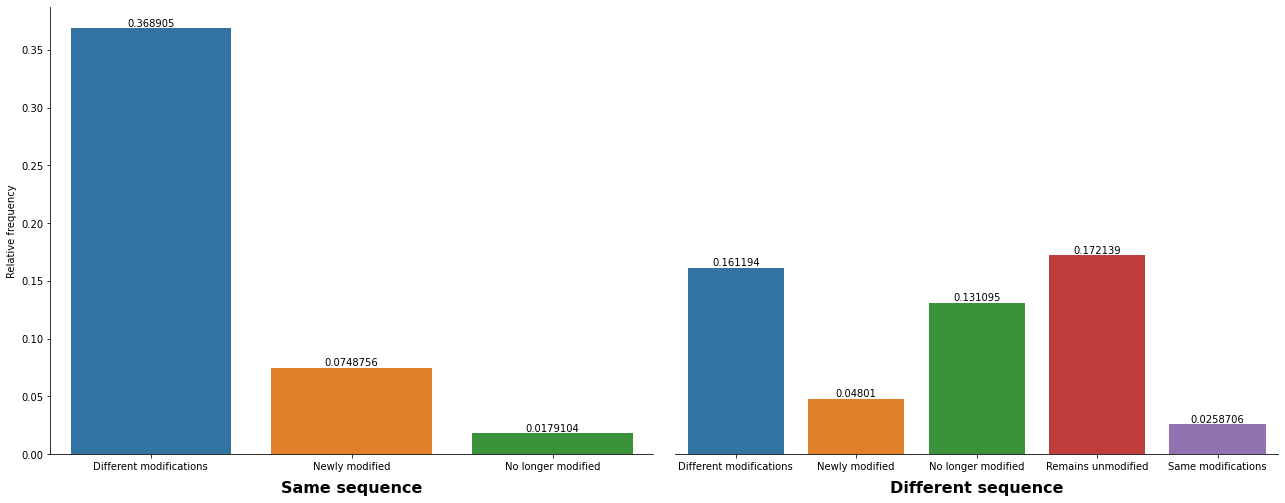

In [49]:
#Hier verder werken!

fig, axes = plt.subplots(1,2,sharey=True, figsize=(18,7))
a = sns.barplot(data=seqevaltrue, x="Mod_eval", y=ipwhich["ionbotID"]/ipwhich["ionbotID"].sum(), ax=axes[0])
b = sns.barplot(data = seqevalfalse, x="Mod_eval", y=ipwhich["ionbotID"]/ipwhich["ionbotID"].sum(), ax=axes[1])
axes[0].set_ylabel("Relative frequency")
axes[1].set_ylabel("Relative frequency")
axes[1].yaxis.set_tick_params(labelbottom=True)
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].set_title("Same sequence", fontweight="bold", fontsize=16, y=-.10)
axes[1].set_title("Different sequence", fontweight="bold", fontsize=16, y=-0.10)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

#axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
#axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
# axes[1].axes.get_yaxis().set_ticks([])
axes[1].axes.get_yaxis().set_visible(False)
for container in axes[0].containers:
    axes[0].bar_label(container)
for container in axes[1].containers:
    axes[1].bar_label(container)

fig.tight_layout()

In [50]:
#Same sequence, different modifications
ionbotvpfind[(ionbotvpfind["Mod_eval"] == "Different modifications") & (ionbotvfragger["Seq_eval"] == True)].groupby(["ionbot_mods_formatted", "pfind_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

/tmp/ipykernel_3317026/3056059124.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ionbotvpfind[(ionbotvpfind["Mod_eval"] == "Different modifications") & (ionbotvfragger["Seq_eval"] == True)].groupby(["ionbot_mods_formatted", "pfind_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)


,,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,...,fragger_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot_mods_formatted,pfind_mods_formatted,,,,,,,,,,,,,,,,,,,,,
"['delta:h(2)c(2)', 'oxidation']",['acetyl'],185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185
"['carbamidomethyl', 'gly']","['carbamidomethyl', 'carbamidomethyl']",181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
"['carbamidomethyl', 'dicarbamidomethyl']","['carbamidomethyl', 'carbamidomethyl', 'carbamidomethyl']",82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
"['carbamidomethyl', 'gg']","['carbamidomethyl', 'carbamidomethyl', 'carbamidomethyl']",80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
"['carbamidomethyl', 'carbamidomethyl[c]|4|[4]carbamidomethyl']","['carbamidomethyl', 'carbamidomethyl', 'carbamidomethyl']",72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
['guanidinyl'],['acetyl'],68,68,68,68,68,68,68,68,68,68,...,68,65,68,68,68,68,68,68,68,68
['gg'],"['carbamidomethyl', 'carbamidomethyl']",57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57


In [51]:
#Same sequence, newly modified
ionbotvpfind[(ionbotvpfind["Mod_eval"] == "Newly modified") & (ionbotvpfind["Seq_eval"] == True)].groupby(["ionbot_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot_mods_formatted,,,,,,,,,,,,,,,,,,,,,
['deamidated'],154,154,154,154,154,154,154,154,154,154,...,0,1,154,154,154,154,154,154,154,154
"['deoxy', 'oxidation']",145,145,145,145,145,145,145,145,145,145,...,0,0,145,145,145,145,145,145,145,145
"['oxidation', 'ser->lacticacid']",1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
['semi_tryptic'],1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [52]:
#Same sequence, no longer modified
ionbotvpfind[(ionbotvpfind["Mod_eval"] == "No longer modified") & (ionbotvpfind["Seq_eval"] == True)].groupby(["pfind_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,...,fragger_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
pfind_mods_formatted,,,,,,,,,,,,,,,,,,,,,
['deamidated'],67,67,67,67,67,67,0,0,67,67,...,55,56,67,67,67,67,67,67,67,67
['thr->cys'],2,2,2,2,2,2,0,0,2,2,...,2,2,2,2,2,2,2,2,2,2
['didehydro'],1,1,1,1,1,1,0,0,1,1,...,1,0,1,1,1,1,1,1,1,1
"['gln->pyro-glu', 'oxidation']",1,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
['glu->pyro-glu+methyl_2h(2)13c(1)'],1,1,1,1,1,1,0,0,1,1,...,0,0,1,1,1,1,1,1,1,1


In [53]:
#Diff sequence, different modifications
ionbotvpfind[(ionbotvpfind["Mod_eval"] == "Different modifications") & (ionbotvpfind["Seq_eval"] == False)].groupby(["ionbot Sequence", "pFind Sequence", "ionbot_mods_formatted", "pfind_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,,,,Spectrum File,Scan,precursor_mass,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,Fragger Sequence,...,fragger_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot Sequence,pFind Sequence,ionbot_mods_formatted,pfind_mods_formatted,,,,,,,,,,,,,,,,,,,,,
LQGIVSWGSNCAQK,LQGIVSWGSGCAQK,['gly->asn'],['carbamidomethyl'],227,227,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,227,227,227
TPCTVTCNIPVVSGK,TPCTVSCNIPVVSGK,"['carbamidomethyl', 'carbamyl']","['carbamidomethyl', 'carbamidomethyl']",52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
FFESFGDLSSPDAVMGNPK,FFESFGDLSTPDAVMGNPK,"['methyl', 'oxidation']",['oxidation'],15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
VESKYGPPCPSCPAPEFLGGPSVFLFPPKPK,SCDKTHTCPPCPAPELLGGPSVFLFPPKPK,['carbamidomethyl'],"['carbamidomethyl', 'carbamidomethyl', 'carbamidomethyl']",13,13,13,13,13,13,0,13,13,13,...,13,13,13,13,13,13,13,13,13,13
VMPICLPSKNYAEVGR,VMPICLPSKDYAEVGR,"['carbamidomethyl', 'deamidated']",['carbamidomethyl'],11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
LKECCDKPLLEK,LKECCEKPLLEK,"['carbamidomethyl', 'carbamidomethyl[c]|6|[34]methyl']","['carbamidomethyl', 'carbamidomethyl']",10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
LQGIVSWGSGCAQK,LQGIVSWGYGCAQK,"['acetyl', 'carbamidomethyl']","['carbamidomethyl', 'tyr->glu']",7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [54]:
#Diff sequence, different modifications
ionbotvpfind[(ionbotvpfind["Mod_eval"] == "Newly modified") & (ionbotvpfind["Seq_eval"] == False)].groupby(["ionbot Sequence", "pFind Sequence", "ionbot_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,,,Spectrum File,Scan,precursor_mass,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,Fragger Sequence,...,pfind_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot Sequence,pFind Sequence,ionbot_mods_formatted,,,,,,,,,,,,,,,,,,,,,
TTPPMLDSDGSFFLYSK,TTPPVLDSDGSFFLYSK,['met->aspsa'],29,29,29,29,29,29,29,29,29,29,...,0,0,29,29,29,29,29,29,29,29
VAPEEHPTLLTEAPLNPK,VAPEEHPVLLTEAPLNPK,['didehydro'],5,5,5,5,5,5,5,5,5,5,...,0,0,5,5,5,5,5,5,5,5
GVVPLAGTNGETTTQGLDGLSER,GVVPLAGTDGETTTQGLDGLSER,['deamidated'],3,3,3,3,3,3,3,3,3,3,...,0,0,3,3,3,3,3,3,3,3
PGVLPLTQPVGPINR,SGDRGETGPAGPAGPVGPVGAR,['hex(2)sulf(1)'],3,3,3,3,3,3,3,3,3,3,...,0,0,3,3,3,3,3,3,3,3
ATPSVTLFPPSSEELQANK,AAPSVTLFPPSSEELQANK,['pro->pyrrolidinone'],3,3,3,3,3,3,3,3,3,3,...,0,0,3,3,3,3,3,3,3,3
GTFCSFDTPDDSIR,SEEVATKEELVADAK,['carbamidomethyl'],2,2,2,2,2,2,0,2,2,2,...,0,0,2,2,2,2,2,2,2,2
YPIEHGIVTNWDDMEK,YPIEHGIITNWDDMEK,['methyl'],2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,2,2,2


In [55]:
#Diff sequence, no longer modified
ionbotvpfind[(ionbotvpfind["Mod_eval"] == "No longer modified") & (ionbotvpfind["Seq_eval"] == False)].groupby(["ionbot Sequence", "pFind Sequence", "pfind_mods_formatted"]).count().sort_values("Scan", ascending=False).head(7)

,,,Spectrum File,Scan,precursor_mass,ionbot peptide mass,comet peptide mass,ionbot modifications,ionbot unexpected modifications,ionbot q-value,ionbot PEP,Fragger Sequence,...,fragger_mods_formatted,comet_mods_formatted,ionbotID,FraggerID,pFindID,CometID,Fragger PEP,code,Seq_eval,Mod_eval
ionbot Sequence,pFind Sequence,pfind_mods_formatted,,,,,,,,,,,,,,,,,,,,,
TPLTATLSK,LCTVATLR,['carbamidomethyl'],11,11,11,11,11,0,0,11,11,11,...,11,11,11,11,11,11,11,11,11,11
VAVFGAGGVGK,IGLFGGAGVGK,['xle->val'],8,8,8,8,8,0,0,8,8,8,...,8,0,8,8,8,8,8,8,8,8
AGIALNDNFVK,NQVSLTCLVK,['carbamidomethyl'],5,5,5,5,5,0,0,5,5,5,...,4,4,5,5,5,5,5,5,5,5
TTGIVMDSGDGVTHIVPIYEGYALPHAILR,TTGIVMDSGDGVTHTVPIYEGYALPHAILR,['oxidation'],5,5,5,5,5,0,0,5,5,5,...,5,5,5,5,5,5,5,5,5,5
MAVTFIGNSTAIQELFK,MSATFIGNSTAIQELFK,['oxidation'],4,4,4,4,4,0,0,4,4,4,...,4,4,4,4,4,4,4,4,4,4
SAGPQSQLLASVIAEK,IIPGFMCQGGDFTR,['carbamidomethyl'],4,4,4,4,4,0,0,4,4,4,...,3,3,4,4,4,4,4,4,4,4
DIEEIIDELK,LSEDLLQVEK,"['acetyl', 'deamidated']",3,3,3,3,3,0,0,3,3,3,...,0,0,3,3,3,3,3,3,3,3


In [56]:
#Diff sequence, no longer modified
ionbotvpfind[(ionbotvpfind["Mod_eval"] == "Same modifications") & (ionbotvpfind["Seq_eval"] == False)].groupby(["ionbot Sequence","pFind Sequence"]).count().sort_values("Scan", ascending=False).head(7)

Spectrum File  Scan  \
ionbot Sequence      pFind Sequence                               
EIVHIQAGQCGNQIGAK    EIVHLQAGQCGNQIGAK                 46    46   
MREIVHIQAGQCGNQIGAK  MREIVHLQAGQCGNQIGAK                6     6   
TLTLVDTGIGMTK        TLTIVDTGIGMTK                      4     4   
TAVCDIPPR            ENFSCLTR                           3     3   
                     VAVCDIPPR                          3     3   
NVQPEDEGIYNCYIMNPPDR YADLTEDQLPSCESLKDTIAR              2     2   
MDENEFVAVTSTNAAK     MDENQFVAVTSTNAAK                   2     2   

                                            precursor_mass  \
ionbot Sequence      pFind Sequence                          
EIVHIQAGQCGNQIGAK    EIVHLQAGQCGNQIGAK                  46   
MREIVHIQAGQCGNQIGAK  MREIVHLQAGQCGNQIGAK                 6   
TLTLVDTGIGMTK        TLTIVDTGIGMTK                       4   
TAVCDIPPR            ENFSCLTR                            3   
                     VAVCDIPPR                           3   
NVQPEDEGIYNCYIMNPPDR YADLTEDQLPSCESLKDTIAR               2   
MDENEFVAVTSTNAAK     MDENQFVAVTSTNAAK                    2   

                                            ionbot peptide mass  \
ionbot Sequence      pFind Sequence                               
EIVHIQAGQCGNQIGAK    EIVHLQAGQCGNQIGAK                       46   
MREIVHIQAGQCGNQIGAK  MREIVHLQAGQCGNQIGAK                      6   
TLTLVDTGIGMTK        TLTIVDTGIGMTK                            4   
TAVCDIPPR            ENFSCLTR                                 3   
                     VAVCDIPPR                                3   
NVQPEDEGIYNCYIMNPPDR YADLTEDQLPSCESLKDTIAR                    2   
MDENEFVAVTSTNAAK     MDENQFVAVTSTNAAK                         2   

                                            comet peptide mass  \
ionbot Sequence      pFind Sequence                              
EIVHIQAGQCGNQIGAK    EIVHLQAGQCGNQIGAK                      46   
MREIVHIQAGQCGNQIGAK  MREIVHLQAGQCGNQIGAK                     6   
TLTLVDTGIGMTK        TLTIVDTGIGMTK                           4   
TAVCDIPPR            ENFSCLTR                                3   
                     VAVCDIPPR                               3   
NVQPEDEGIYNCYIMNPPDR YADLTEDQLPSCESLKDTIAR                   2   
MDENEFVAVTSTNAAK     MDENQFVAVTSTNAAK                        2   

                                            ionbot modifications  \
ionbot Sequence      pFind Sequence                                
EIVHIQAGQCGNQIGAK    EIVHLQAGQCGNQIGAK                        46   
MREIVHIQAGQCGNQIGAK  MREIVHLQAGQCGNQIGAK                       6   
TLTLVDTGIGMTK        TLTIVDTGIGMTK                             4   
TAVCDIPPR            ENFSCLTR                                  3   
                     VAVCDIPPR                                 3   
NVQPEDEGIYNCYIMNPPDR YADLTEDQLPSCESLKDTIAR                     2   
MDENEFVAVTSTNAAK     MDENQFVAVTSTNAAK                          2   

                                            ionbot unexpected modifications  \
ionbot Sequence      pFind Sequence                                           
EIVHIQAGQCGNQIGAK    EIVHLQAGQCGNQIGAK                                    3   
MREIVHIQAGQCGNQIGAK  MREIVHLQAGQCGNQIGAK                                  1   
TLTLVDTGIGMTK        TLTIVDTGIGMTK                                        0   
TAVCDIPPR            ENFSCLTR                                             0   
                     VAVCDIPPR                                            0   
NVQPEDEGIYNCYIMNPPDR YADLTEDQLPSCESLKDTIAR                                0   
MDENEFVAVTSTNAAK     MDENQFVAVTSTNAAK                                     0   

                                            ionbot q-value  ionbot PEP  \
ionbot Sequence      pFind Sequence                                      
EIVHIQAGQCGNQIGAK    EIVHLQAGQCGNQIGAK                  46          46   
MREIVHIQAGQCGNQIGAK  MREIVHLQAGQCGNQIGAK                 6           6   
TLTLVDTGIGMTK        TLTIVDTGIGMTK                       4   

# For spectra annotation

In [57]:
alldiff = data[data["code"] == "Different for all 4"]

In [58]:
alldiff.columns

Index(['Spectrum File', 'Scan', 'precursor_mass', 'ionbot Sequence',
       'ionbot peptide mass', 'comet peptide mass', 'ionbot modifications',
       'ionbot unexpected modifications', 'ionbot q-value', 'ionbot PEP',
       'Fragger Sequence', 'Fragger Modified Sequence', 'Fragger Probability',
       'Fragger modifications', 'Fragger unexpected modifications',
       'MSFragger Localization', 'pFind Sequence', 'pFind Modification',
       'pFind q-value', 'Comet Sequence', 'Comet q-value', 'Comet PEP',
       'MSFragger Peptide Mass', 'pFind Peptide Mass', 'ionbot proteins',
       'comet proteins', 'fragger proteins', 'pfind proteins',
       'Comet Raw Sequence', 'ionbot_mods_formatted', 'all_fragger_mods',
       'fragger_mods_formatted', 'pfind_mods_formatted',
       'comet_mods_formatted', 'ionbotID', 'FraggerID', 'pFindID', 'CometID',
       'Fragger PEP', 'code'],
      dtype='object')

In [59]:
forannot = alldiff.filter(["Spectrum File", "Scan", "precursor_mass", "ionbotID", "FraggerID", "pFindID", "CometID"])

In [60]:
forannot.reset_index(inplace=True)

In [61]:
een8740 = forannot[forannot["index"] == 6857]

In [62]:
een8740

,index,Spectrum File,Scan,precursor_mass,ionbotID,FraggerID,pFindID,CometID
5,6857,131023_Sunil_PPT_Brain_A_09,18740.0,1988.02805,131023_Sunil_PPT_Brain_A_0918740.0GTVGAPSVFIFP...,131023_Sunil_PPT_Brain_A_0918740.0TVAAPSVFIFPP...,131023_Sunil_PPT_Brain_A_0918740.0YPIEHGIVTNWD...,131023_Sunil_PPT_Brain_A_0918740.0AIAELGIYPAVD...


In [63]:
een4751 = data[(data["Spectrum File"] == "131023_Sunil_PPT_Brain_A_01") & (data["Scan"] == 14751)]

In [3]:
test = pd.read_csv('/home/robbe/ionbot/Voor_vergelijking_OSE/From_scratch/Quant/ionbot/flashlfq.tsv', sep="\t")

In [21]:
test["File Name"].unique()

array(['131119_Sunil_Prot_BrainAmine_ACentroid_01',
       '131119_Sunil_Prot_BrainAmine_ACentroid_02',
       '131119_Sunil_Prot_BrainAmine_ACentroid_03',
       '131119_Sunil_Prot_BrainAmine_ACentroid_04',
       '131119_Sunil_Prot_BrainAmine_ACentroid_05',
       '131119_Sunil_Prot_BrainAmine_ACentroid_06',
       '131119_Sunil_Prot_BrainAmine_ACentroid_07',
       '131119_Sunil_Prot_BrainAmine_ACentroid_08',
       '131119_Sunil_Prot_BrainAmine_ACentroid_09',
       '131119_Sunil_Prot_BrainAmine_ACentroid_10',
       '131119_Sunil_Prot_BrainAmine_ACentroid_11',
       '131119_Sunil_Prot_BrainAmine_ACentroid_12',
       '131119_Sunil_Prot_BrainAmine_ACentroid_13',
       '131119_Sunil_Prot_BrainAmine_ACentroid_14',
       '131119_Sunil_Prot_BrainAmine_ACentroid_15',
       '131119_Sunil_Prot_BrainAmine_ACentroid_16',
       '131119_Sunil_Prot_BrainAmine_ACentroid_17',
       '131119_Sunil_Prot_BrainAmine_ACentroid_18',
       '131119_Sunil_Prot_BrainAmine_ACentroid_19',
       '1311